# Batch results

Here we load every `.npz` created above and compute some statistics.

In [4]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def get_index(string, shift=0):
    if string.startswith('0.0'):
        return 0 - shift
    if string == '0.5':
        return 1 - shift
    if string == '1.0':
        return 2 - shift
    if string == '2.0':
        return 3 - shift
    if string == '3.0':
        return 4 - shift
    if string == '4.0':
        return 5 - shift
    if string == '5.0':
        return 6 - shift
    return None

def init_stats(l_labels, g_labels):
    grid_shape = (len(l_labels), len(g_labels))
    stats = {
        "prostate": {
            "final": {
                "dice": {
                "mean": np.full(shape=grid_shape, fill_value=np.nan),
                "std": np.full(shape=grid_shape, fill_value=np.nan)
            }
            },
            "pre": {
                "dice": {
                "mean": np.full(shape=grid_shape, fill_value=np.nan),
                "std": np.full(shape=grid_shape, fill_value=np.nan)
            }
            },
            "def": {
                "dice": {
                "mean": np.full(shape=grid_shape, fill_value=np.nan),
                "std": np.full(shape=grid_shape, fill_value=np.nan)
            }
            },
        },
        "target": {
            "final": {
                "valid": {
                    "ratio": np.full(shape=grid_shape, fill_value=np.nan),
                    "dice": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    },
                    "error": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    }
                },
                "good": {
                    "ratio": np.full(shape=grid_shape, fill_value=np.nan),
                    "dice": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    },
                    "error": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    }
                },
                "decent": {
                    "ratio": np.full(shape=grid_shape, fill_value=np.nan),
                    "dice": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    },
                    "error": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    }
                },
                "bad": {
                    "ratio": np.full(shape=grid_shape, fill_value=np.nan),
                    "dice": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    },
                    "error": {
                        "mean": np.full(shape=grid_shape, fill_value=np.nan),
                        "std": np.full(shape=grid_shape, fill_value=np.nan)
                    }
                },
            },
            "pre": {
                "dice": {
                    "mean": np.full(shape=grid_shape, fill_value=np.nan),
                    "std": np.full(shape=grid_shape, fill_value=np.nan)
                },
                "error": {
                    "mean": np.full(shape=grid_shape, fill_value=np.nan),
                    "std": np.full(shape=grid_shape, fill_value=np.nan)
                }
            },
            "def": {
                "dice": {
                    "mean": np.full(shape=grid_shape, fill_value=np.nan),
                    "std": np.full(shape=grid_shape, fill_value=np.nan)
                },
                "error": {
                    "mean": np.full(shape=grid_shape, fill_value=np.nan),
                    "std": np.full(shape=grid_shape, fill_value=np.nan)
                }
            }
        }
    }
    return stats

def store_stats(stats, results, l, g, good_dice_threshold=0.25):
    # PROSTATE: PRE AND DEF (only Dice)
    stats["prostate"]["def"]["dice"]["mean"][l, g] = results['prostate_dice_def'].mean()
    stats["prostate"]["def"]["dice"]["std"][l, g] = results['prostate_dice_def'].std()
    stats["prostate"]["pre"]["dice"]["mean"][l, g] = results['prostate_dice_pre'].mean()
    stats["prostate"]["pre"]["dice"]["std"][l, g] = results['prostate_dice_pre'].std()
    # PROSTATE: FINAL (only Dice)
    stats["prostate"]["final"]["dice"]["mean"][l, g] = results['prostate_dice'].mean()
    stats["prostate"]["final"]["dice"]["std"][l, g] = results['prostate_dice'].std()

    # TARGET: PRE AND DEF
    stats["target"]["def"]["dice"]["mean"][l, g] = results['target_dice_def'].mean()
    stats["target"]["def"]["dice"]["std"][l, g] = results['target_dice_def'].std()
    stats["target"]["def"]["error"]["mean"][l, g] = results['target_error_def'].mean()
    stats["target"]["def"]["error"]["std"][l, g] = results['target_error_def'].std()
    stats["target"]["pre"]["dice"]["mean"][l, g] = results['target_dice_pre'].mean()
    stats["target"]["pre"]["dice"]["std"][l, g] = results['target_dice_pre'].std()
    stats["target"]["pre"]["error"]["mean"][l, g] = results['target_error_pre'].mean()
    stats["target"]["pre"]["error"]["std"][l, g] = results['target_error_pre'].std()
    # TARGET: FINAL (valid)
    valid_dice_vals = results['target_dice'][np.isfinite(results['target_dice'])]
    valid_error_vals = results['target_error'][np.isfinite(results['target_error'])]
    stats["target"]["final"]["valid"]["ratio"][l, g] = len(valid_dice_vals) / len(results['target_dice'])
    stats["target"]["final"]["valid"]["dice"]["mean"][l, g] = valid_dice_vals.mean()
    stats["target"]["final"]["valid"]["dice"]["std"][l, g] = valid_dice_vals.std()
    stats["target"]["final"]["valid"]["error"]["mean"][l, g] = valid_error_vals.mean()
    stats["target"]["final"]["valid"]["error"]["std"][l, g] = valid_error_vals.std()
    # TARGET: FINAL (good)
    good_dice_vals = results['target_dice'][results['target_dice'] > good_dice_threshold]
    good_error_vals = results['target_error'][results['target_dice'] > good_dice_threshold]
    stats["target"]["final"]["good"]["ratio"][l, g] = len(good_dice_vals) / len(results['target_dice'])
    stats["target"]["final"]["good"]["dice"]["mean"][l, g] = good_dice_vals.mean()
    stats["target"]["final"]["good"]["dice"]["std"][l, g] = good_dice_vals.std()
    stats["target"]["final"]["good"]["error"]["mean"][l, g] = good_error_vals.mean()
    stats["target"]["final"]["good"]["error"]["std"][l, g] = good_error_vals.std()
    # TARGET: FINAL (decent)
    decent_dice_vals = results['target_dice'][results['target_dice'] > 0]
    decent_error_vals = results['target_error'][results['target_dice'] > 0]
    stats["target"]["final"]["decent"]["ratio"][l, g] = len(decent_dice_vals) / len(results['target_dice'])
    stats["target"]["final"]["decent"]["dice"]["mean"][l, g] = decent_dice_vals.mean()
    stats["target"]["final"]["decent"]["dice"]["std"][l, g] = decent_dice_vals.std()
    stats["target"]["final"]["decent"]["error"]["mean"][l, g] = decent_error_vals.mean()
    stats["target"]["final"]["decent"]["error"]["std"][l, g] = decent_error_vals.std()
    # TARGET: FINAL (bad)
    bad_dice_vals = results['target_dice'][results['target_dice'] == 0]
    bad_error_vals = results['target_error'][results['target_dice'] == 0]
    stats["target"]["final"]["bad"]["ratio"][l, g] = len(bad_dice_vals) / len(results['target_dice'])
    stats["target"]["final"]["bad"]["dice"]["mean"][l, g] = bad_dice_vals.mean()
    stats["target"]["final"]["bad"]["dice"]["std"][l, g] = bad_dice_vals.std()
    stats["target"]["final"]["bad"]["error"]["mean"][l, g] = bad_error_vals.mean()
    stats["target"]["final"]["bad"]["error"]["std"][l, g] = bad_error_vals.std()

    return stats

In [12]:
path_results = Path(r"../../results")
l_labels = ('0', '0.5', '1', '2', '3', '4', '5')
g_labels = ('0', '0.5', '1', '2', '3')
stats = init_stats(l_labels, g_labels)
for r in path_results.rglob("results*"):
    _, l, g = r.stem.split("_")
    l, g = get_index(l), get_index(g)
    results = np.load(r, allow_pickle=True)['arr_0'].tolist()

    stats = store_stats(stats, results, l, g)

C:\Users\ML\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:143: RuntimeWarning: Mean of empty slice.
C:\Users\ML\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:145: RuntimeWarning: Mean of empty slice.
C:\Users\ML\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:151: RuntimeWarning: Mean of empty slice.
C:\Users\ML\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:153: RuntimeWarning: Mean of empty slice.


Some plots

In [ ]:
def plot_target_mean_stats(target_set):
    _, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='all')

    sns.heatmap(target_set["ratio"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0])
    ax[0].set_title("% of decent Dice (Dice > 0)"), ax[0].set_xlabel("Gamma"), ax[0].set_ylabel("Lambda")

    sns.heatmap(target_set["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1])
    ax[1].set_title("Target Dice coefficients"), ax[1].set_xlabel("Gamma"), ax[1].set_ylabel("Lambda")
    #for t in hm.texts: t.set_text(f"{t.get_text()}±{valid_dice_std[[int(p) for p in t.get_position()]]}")

    sns.heatmap(target_set["error"]["mean"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[2])
    ax[2].set_title("Target Registration Error (TRE) [mm]"), ax[2].set_xlabel("Gamma"), ax[2].set_ylabel("Lambda")

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

plot_target_mean_stats(stats["target"]["final"]["valid"])

In [ ]:
_, ax = plt.subplots(2, 3, figsize=(20, 10), sharey='all')

axx = ax[0, 0]
sns.heatmap(stats["target"]["pre"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
axx.set_title("Target Dice PRE [MEAN]"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

axx = ax[1, 0]
sns.heatmap(stats["target"]["pre"]["dice"]["std"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
axx.set_title("Target Dice PRE [STD]"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

axx = ax[0, 1]
sns.heatmap(stats["target"]["final"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
axx.set_title("Target Dice PRE"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

axx = ax[1, 1]
sns.heatmap(stats["target"]["final"]["valid"]["error"]["mean"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
axx.set_title("TRE PRE"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

axx = ax[0, 2]
sns.heatmap(stats["prostate"]["final"]["dice"]["std"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
axx.set_title("Target Dice PRE STD"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

axx = ax[1, 2]
sns.heatmap(stats["target"]["final"]["valid"]["error"]["std"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=axx)
axx.set_title("TRE PRE STD"), axx.set_xlabel("Gamma"), axx.set_ylabel("Lambda")

plt.subplots_adjust(wspace=0.25, hspace=0.30)
plt.show()

In [ ]:
_, ax = plt.subplots(2, 3, figsize=(20, 12), sharey='all')

sns.heatmap(stats["prostate"]["final"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0, 0])
ax[0, 0].set_title("Prostate Dice coefficients MEAN"), ax[0, 0].set_xlabel("Gamma"), ax[0, 0].set_ylabel("Lambda")

sns.heatmap(stats["prostate"]["final"]["dice"]["std"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1, 0])
ax[1, 0].set_title("Prostate Dice coefficients STD"), ax[1, 0].set_xlabel("Gamma"), ax[1, 0].set_ylabel("Lambda")

sns.heatmap(stats["target"]["final"]["valid"]["dice"]["mean"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0, 1])
ax[0, 1].set_title("Target Dice coefficients MEAN"), ax[0, 1].set_xlabel("Gamma"), ax[0, 1].set_ylabel("Lambda")

sns.heatmap(stats["target"]["final"]["valid"]["dice"]["std"], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1, 1])
ax[1, 1].set_title("Target Dice coefficients STD"), ax[1, 1].set_xlabel("Gamma"), ax[1, 1].set_ylabel("Lambda")

sns.heatmap(stats["target"]["final"]["valid"]["error"]["mean"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[0, 2])
ax[0, 2].set_title("Target Registration Error (TRE) MEAN [mm]"), ax[0, 2].set_xlabel("Gamma"), ax[0, 2].set_ylabel("Lambda")

sns.heatmap(stats["target"]["final"]["valid"]["error"]["std"], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax[1, 2])
ax[1, 2].set_title("Target Registration Error (TRE) STD [mm]"), ax[1, 2].set_xlabel("Gamma"), ax[1, 2].set_ylabel("Lambda")

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

Save figures one by one

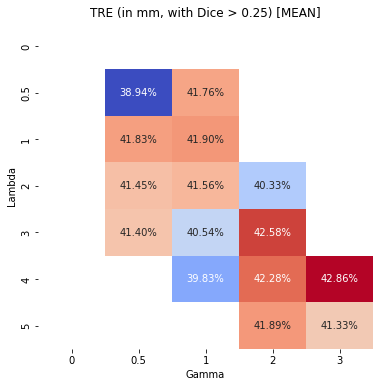

In [13]:
_, ax = plt.subplots(figsize=(6, 6))
metric = "mean"
dice = True
what, how = ("dice", ".2%") if dice else ("error", ".2f")
sns.heatmap(
    stats["target"]["final"]["good"][what][metric],
    annot=True, fmt=how,
    xticklabels=g_labels, yticklabels=l_labels,
    cmap="coolwarm", cbar=False,
    ax=ax)
ax.set_title(f"TRE (in mm, with Dice > 0.25) [{metric.upper()}]")
ax.set_xlabel("Gamma")
ax.set_ylabel("Lambda")
plt.show()
#plt.savefig(f"figures/targets_final_good_{what}_{metric}.pdf", bbox_inches="tight")

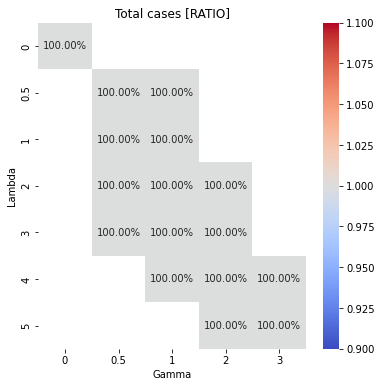

In [75]:
_, ax = plt.subplots(figsize=(6, 6))
metric = "mean"
what = "error"
sns.heatmap(stats["target"]["final"]["good"][what][metric], annot=True, fmt='.2f', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax)
ax.set_title(f"TRE (in mm, with Dice > 0.25) [{metric.upper()}]")
ax.set_xlabel("Gamma")
ax.set_ylabel("Lambda")
#plt.show()
plt.savefig(f"figures/targets_final_good_{what}_{metric}.pdf", bbox_inches="tight")

# _, ax = plt.subplots(figsize=(6, 6))
# metric = "ratio"
# sns.heatmap(stats["target"]["final"]["valid"][metric], annot=True, fmt='.2%', xticklabels=g_labels, yticklabels=l_labels, cmap="coolwarm", ax=ax)
# ax.set_title(f"Total cases [{metric.upper()}]")
# ax.set_xlabel("Gamma")
# ax.set_ylabel("Lambda")
# #plt.show()
# plt.savefig(f"figures/targets_final_valid_{metric}.pdf", bbox_inches="tight")